In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/Lauren/Voytek/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')
sys.path.append('/Users/rdgao/Documents/code/research/fooof/')

%matplotlib inline

# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os

import neurodsp as ndsp
from fooof import FOOOFGroup
from scv_funcs import lfpca
from scv_funcs import utils
from scv_funcs import access_nt as asc

In [4]:
saveout_path = "../results/nt/"
lfpca_files = sorted([f for f in os.listdir(saveout_path) if 'lfpca_' in f])
fooof_files = sorted([f for f in os.listdir(saveout_path) if 'fooof' in f])

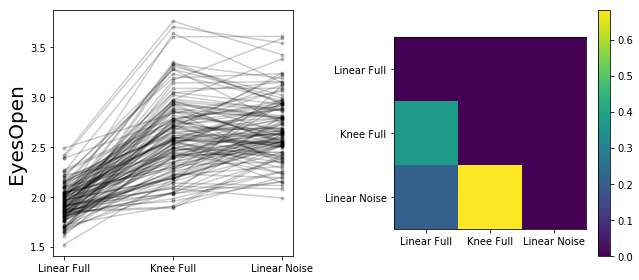

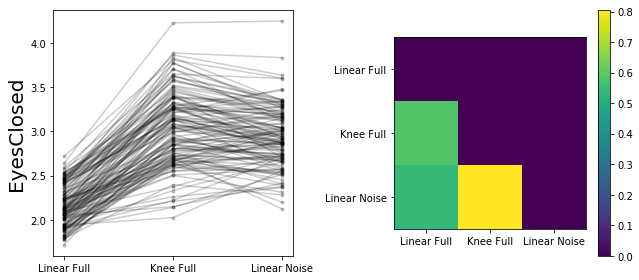

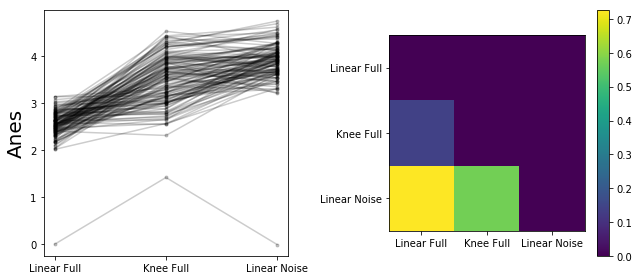

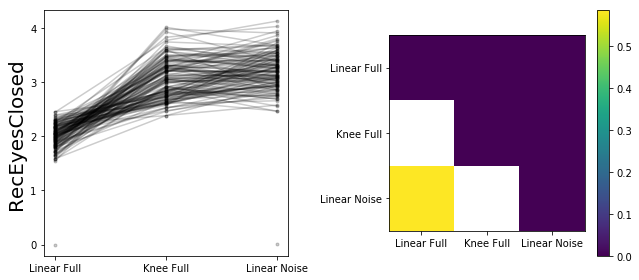

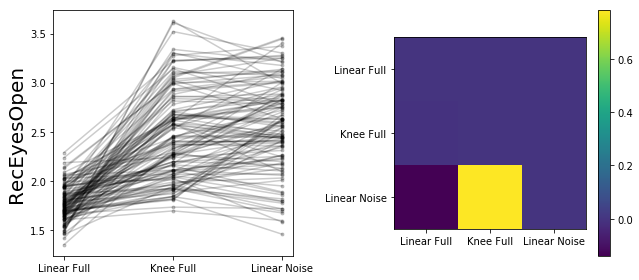

In [6]:
for ind, f in enumerate(fooof_files):
    fooof_data = np.load(saveout_path+f)
    #slope knee r2
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    plt.plot(fooof_data['fooof_res'][:,0,:].T,'.-k', alpha=0.2)
    plt.ylabel(lfpca_files[ind][10:-4], fontsize=20)
    plt.xticks(range(3), ('Linear Full', 'Knee Full', 'Linear Noise'))
    plt.subplot(1,2,2)    
    plt.imshow(np.tril(np.corrcoef(fooof_data['fooof_res'][:,0,:].T),k=-1))
    plt.colorbar()
    plt.xticks(range(3), ('Linear Full', 'Knee Full', 'Linear Noise'))    
    plt.yticks(range(3), ('Linear Full', 'Knee Full', 'Linear Noise'))
    plt.tight_layout()

### fooof observations
- in general, 1/f exponent derived from fitting the full range (3-100Hz) with knee (i.e. Lorentzian function) is more correlated with exponent fit in the noise region (30-70Hz), except, it seems, the anesthesia state